# Задание по курсу "Анализ данных"

### Разбить заданный датасет на 2 кластера, используя агломеративный иерархический метод и метод к-средних. 

### Методом главных компонент построить два новых признака для описания объектов из датасета и кластеризовать данные по этим двум признакам на два кластера (любым методом). Сравнить качество кластеризации. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans

In [2]:
df = pd.read_csv('data/beauty.csv')
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [4]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [6]:
df.wage.value_counts()

wage
3.75     36
7.69     32
4.81     28
1.98     24
7.96     21
         ..
6.66      1
3.58      1
1.63      1
11.06     1
1.61      1
Name: count, Length: 520, dtype: int64

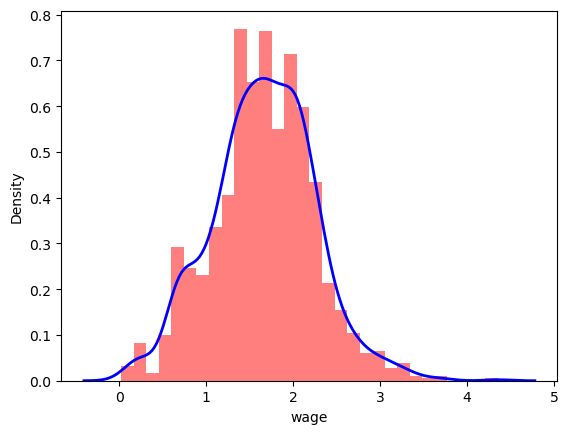

In [10]:
log_values = df.wage.apply(np.log)

plt.hist(log_values, bins=30, color='red', alpha=0.5, density=True)

sns.kdeplot(log_values, color='blue', linewidth=2);

<Axes: >

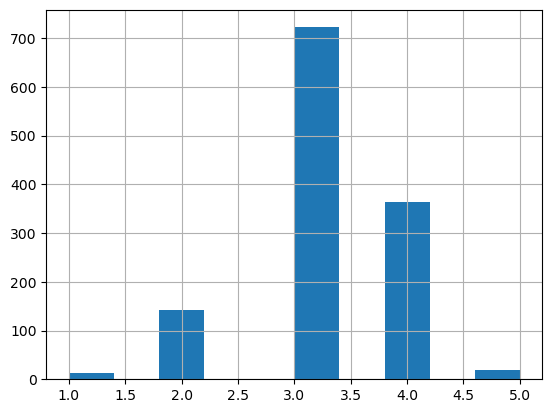

In [ ]:
df.looks.hist();

In [27]:
df.female.value_counts()

female
0    824
1    436
Name: count, dtype: int64

In [28]:
df.married.value_counts()

married
1    871
0    389
Name: count, dtype: int64